# Analysis on the impact of Climatic and Economic Factors on Walmart's weekly sales.

## (a) Business Understanding

Walmart is a multinational retail corporation that operates on a chain of hypermarkets, discounts department stores, and grocery stores. The company's business model is based on selling a wide variety of general merchandaise at low prices.Walmart's success is driven by its ability to offer customers a convenient and affordable shopping experience, both in-store and online.

One of the challenges that walmart faces is the need to remain competitive in an increasingly  crowded retail landscape. Theis requires the company to continuously innovate and improve its operation to meet changing customer needs and preferences.

Our project aims to help the Board of Directors of Walmart adress this challenges by providing detailed analysis and insights into the factores that affect its business. By understanding the key drivers of Walmart's sucess we can help the company develop strategies to optimize its operations and better serve its stakeholders.

Our project will provide their board of directors valuable insights and actionable recommendations to help the company navigate the complex business environment and achieve its goals.

## (b) Problem statement


The problem this project aims to address is the need for a better understanding and how these climatic andd economic factors influence the weekly sales of walmart.By analyzing the impact of these factors on Walmart's sales, we provide valuable insights to help the company optimize its operation and better serve their customers.Through analysis we will provide actionable recommendations to help Walmart improve its sales performance and achieve its business objectives

# Data Understanding

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import datetime
import re

In [2]:
#reading the dataset
df = pd.read_csv ('walmart.csv')
df.head(2)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [3]:
#checking last records in the dataset
df.tail(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
df.shape

(6435, 8)

In [5]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#checking the missing values in the dataset
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#checking Duplicates
df.duplicated().value_counts()

False    6435
dtype: int64

In [8]:
#checking the unique values in the weekly_sales column
df['Weekly_Sales'].unique()


array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [9]:

# Function to check for any special characters except " . " and " - "
def contains_special_characters(value):
    return bool(re.search(r"[^\w\s\.\-]", value))

# Create a temporary copy of dataframe with all values as string for cross-checking.
validity_check = df.astype("string")

# Create a boolean mask of the dataframe by applying above function.
mask = validity_check.applymap(contains_special_characters)

# Query the dataframe for records containing special characters.
result = validity_check[mask.any(axis=1)]

# Display Results
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         0 non-null      string
 1   Date          0 non-null      string
 2   Weekly_Sales  0 non-null      string
 3   Holiday_Flag  0 non-null      string
 4   Temperature   0 non-null      string
 5   Fuel_Price    0 non-null      string
 6   CPI           0 non-null      string
 7   Unemployment  0 non-null      string
dtypes: string(8)
memory usage: 0.0 bytes


In [10]:
# Dataset Statistical Information
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Data Description

1. We deduce that the dataset has 6430 rows and 8 columns with 7 numericals and 1 object
2. There is no missing values
3. The dataset has no duplicates
4. The least temperature is -2.060000 F and the highest is 100.14000

# Data Preparation

In [11]:
#dropping irrelevant columns
df.drop(['Store'],  axis=1, inplace=True)


In [13]:
df.columns

Index(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [12]:
df.head()



,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
#converting date to datetime
df["Date"] = pd.to_datetime (df["Date"], format="%d-%m-%Y")


In [16]:
# Statistical Information
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


The precise degree Fahrenheit is less significant for studying consumer turnout and sales than the general climatic condition given by the temperature value, which influences customers' demands and likelihood to go shopping.

Therefore, we will group the temperature data into 4 Seasons
1. Summer (>60 degrees)
2. Autumn (40 to 60 degrees)
3. Winter (< 20 degrees)
4. Spring (20 to 40 degrees)



In [14]:
#Season Mapping
season_map = {
    "summer" : [1, (60, 120)],
    "autumn"     : [2,  (40, 60)],
    "winter"     : [3,  (-20, 20)],
    "spring"     : [4,  (20, 40)],
}

In [15]:
# Function to Map Season Conditions
def map_season(value):
    for i in season_map:
        if ((value > season_map[i][1][0]) & (value <= season_map[i][1][1])):
            return i
        else:
            pass
        

def map_season_numerically(value):
    for i in season_map:
        if ((value > season_map[i][1][0]) & (value <= season_map[i][1][1])):
            return season_map[i][0]
        else:
            pass

In [16]:
df["season"] = df["Temperature"].apply(map_season)

# Apply Numerical Weather Mapping to Dataframe
df["season_num"] = df["Temperature"].apply(map_season_numerically)
df[["Temperature", "season", "season_num"]].head()


,Temperature,season,season_num
0,42.31,autumn,2
1,38.51,spring,4
2,39.93,spring,4
3,46.63,autumn,2
4,46.50,autumn,2


In [17]:
df[["Temperature", "season", "season_num"]].tail()

,Temperature,season,season_num
6430,64.88,summer,1
6431,64.89,summer,1
6432,54.47,autumn,2
6433,56.47,autumn,2
6434,58.85,autumn,2


In [27]:
# checking Season Values
df["season"].value_counts()

summer    3498
autumn    1948
spring     903
winter      86
Name: season, dtype: int64

In [18]:
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,season,season_num
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,autumn,2
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,spring,4
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,spring,4
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,autumn,2
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,autumn,2


## Modelling

In [ ]:
Usingsm.ols()

In [28]:
df.columns

Index(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'season', 'season_num'],
      dtype='object')

In [29]:
X = df[["Temperature", "Fuel_Price", "season_num" ]]
y = df["Weekly_Sales"]
# add constant to the model
x = sm.add_constant(X)

# create model object
model = sm.OLS(y, x)
# fit the model
result = model.fit(method='pinv')
# print the summary output 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.41
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           7.89e-07
Time:                        14:51:07   Log-Likelihood:                -94336.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6431   BIC:                         1.887e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.199e+06   8.56e+04     13.995      0.000    1.03e+06    1.37e+06
Temperature -3091.2266    758.211     -4.077      0.000   -4577.573   -1604.880
Fuel_Price   2.215e+04   1.55e+04      1.431      0.153   -8200.184    5.25e+04
season_num  -2.198e+04   1.36e+04     -1.613      0.107   -4.87e+04    4729.731
==============================================================================
Omnibus:                      407.352   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.181
Skew:                           0.675   Prob(JB):                    5.96e-107
Kurtosis:                       2.990   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 There is a  positive coefficient in Fuel_price  indicating  that as the value of the independent variable increases, the mean of the dependent variable which is Weekly_Sales also tends to increase.
 There is negative coefficients in Temperature and seasons suggestsing that as the independent variables increases, the weekly sales tends to decrease.
 

Based on the analysis of climatic and economic factors on Walmart's weekly sales, we can draw the following conclusions:

Temperature: The analysis shows that there is a negative correlation between temperature and weekly sales. As the temperature increases, the weekly sales tend to decrease. This may be attributed to the fact that extreme temperatures can discourage people from going out for shopping, especially during very hot or very cold weather.

Fuel Price: The analysis indicates a positive correlation between fuel prices and weekly sales. As fuel prices increase, weekly sales tend to increase. This may be because higher fuel prices can impact consumers' transportation costs, leading them to prefer shopping at Walmart, which offers lower prices, and hence driving up sales.

Season: The season does not show a significant impact on weekly sales, as indicated by the non-significant coefficient for the season_num variable. However, the data is categorized into four seasons, and this analysis suggests that there might be some variation in sales during different seasons, although it is not statistically significant.

Moreover, employing machine learning models, such as regression, decision trees, or random forests, could potentially yield more insights into the complex interplay of factors influencing Walmart's weekly sales.

## Visualizations

In [29]:
plt.style.use('Solarize_Light2')

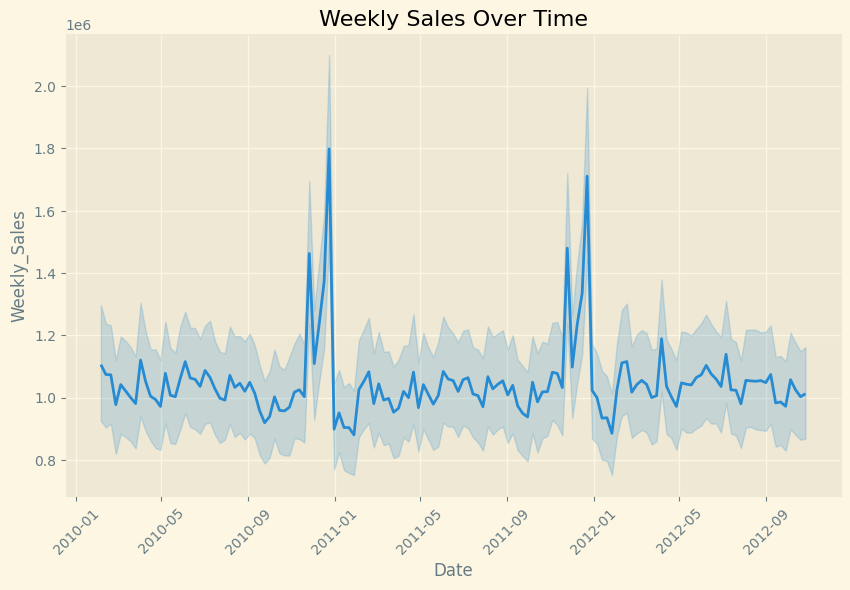

In [30]:
# Line plot for Weekly Sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.xticks(rotation=45)
plt.title('Weekly Sales Over Time')
plt.show()


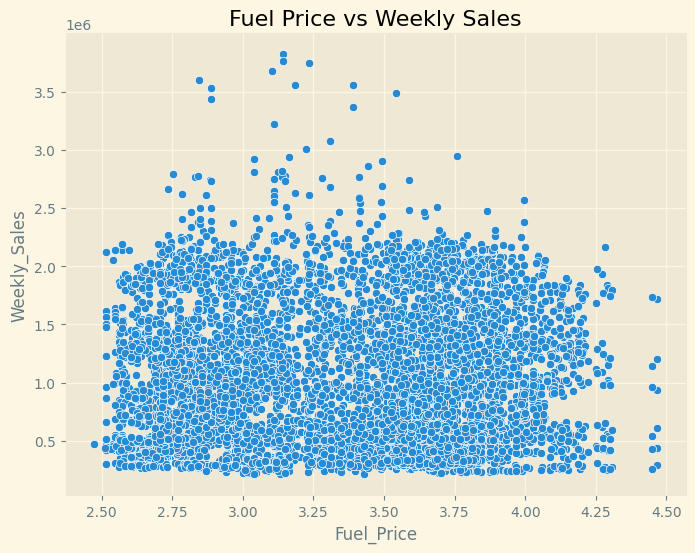

In [31]:
# Scatter plot for Fuel Price vs Weekly Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Fuel Price vs Weekly Sales')
plt.show()


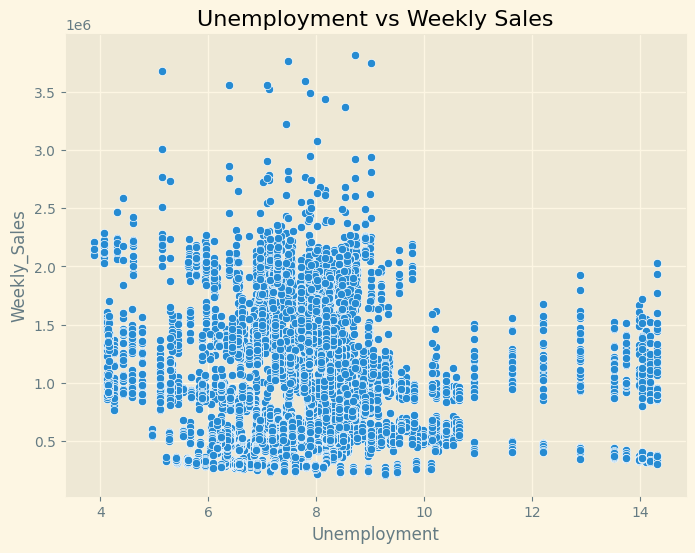

In [32]:

# Scatter plot for Unemployment vs Weekly Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Unemployment vs Weekly Sales')
plt.show()

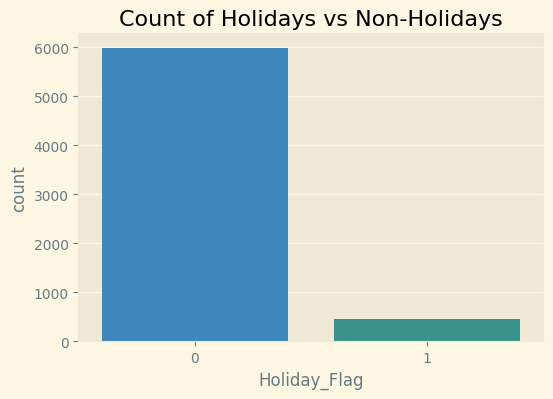

In [33]:
# Bar plot for Holiday Flag
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Count of Holidays vs Non-Holidays')
plt.show()